# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**


* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины. Правила переноса дедлайнов определены в презентации с первого занятия.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Задачи 1 и 2 сдаются в систему Яндекс.Контест. Ссылка на контест в телеграм-боте.


**Сдача задачи 3:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 10 баллов
* Задача 2 &mdash; 10 баллов
* Задача 3 &mdash; 80 баллов


Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [1]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand

sns.set(style='whitegrid', font_scale=1.3, palette='rainbow')

In [3]:
pd.options.mode.chained_assignment = None

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 2.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 3.

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

На дополнительном занятии 10 февраля будет показан простой пример работы с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных обучить несколько классификаторов для определения выживших, иначе говоря, получить некоторые приближенные правила определения, выжил пассажир или нет, а также сравнить эти правила по качеству приближения.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [4]:
data = pd.read_csv('train.csv', index_col=0)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [5]:
rows_count = len(data.index);
train_count = int((rows_count / 10) * 7);

data = data.sample(frac=1).reset_index();

train = data.iloc[:train_count];
test = data.iloc[train_count:(rows_count + 1)].reset_index()
test


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,623,116,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,NaN,S
1,624,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
2,625,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,NaN,S
3,626,426,0,3,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S
4,627,817,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,STON/O2. 3101290,7.9250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,886,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S
264,887,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,NaN,S
265,888,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S
266,889,791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q


Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [6]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [7]:
train.dropna(subset=features_columns, inplace=True);
test.dropna(subset=features_columns, inplace=True);

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

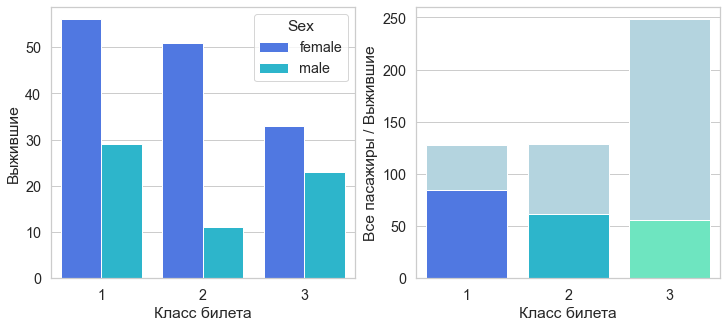

In [8]:
with sns.axes_style('whitegrid'):
    fig, axes = plt.subplots(1, 2, figsize=(12,5))
    sns.barplot(data=train.groupby(by=['Sex', 'Pclass']).sum().reset_index(), x='Pclass', y='Survived', hue='Sex', ax=axes[0], ci=None)
    axes[0].set(xlabel='Класс билета', ylabel='Выжившие')
    
    tmp = train['Pclass'].value_counts();
    sns.set_color_codes("muted")
    sns.barplot(x=tmp.index, y=tmp.values, ax=axes[1], color='lightblue', ci=None)
    sns.set_color_codes("pastel")
    sns.barplot(data=train.groupby(by=['Pclass']).sum().reset_index(), x='Pclass', y='Survived', ax=axes[1], ci=None)
    axes[1].set(xlabel='Класс билета', ylabel='Все пасажиры / Выжившие')
    

По графикам выше видно, что чем выше был класс билета, тем больше человек спаслись.
Также можно сказать, что вне зависимости от класса билета женщины имели больший шанс спастить.

In [9]:
train.insert(0, 'tmp', 0)
def age_classify(age):
    if age <= 17:
        #kid
        return 0;
    elif age > 17 and age <= 25:
        #young
        return 1;
    elif age > 25 and age <= 55:
        #mature
        return 2;
    elif age > 55 and age <= 100:
        #old
        return 3;

   tmp  PassengerId  Survived  Pclass      Age  SibSp  Parch       Fare
0    0        32372        43     214   708.33    119     84  2318.7834
1    1        59092        48     319  2833.00     44     46  4024.4330
2    2       124093       104     554  9622.00     99     80  9039.8415
3    3        12395         8      43  1802.50      6     10  1406.2542


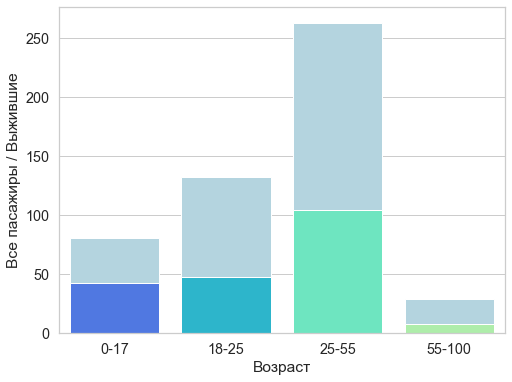

In [10]:
train['tmp'] = train['Age'].apply(age_classify)

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(8,6))
    
    tmp = train['tmp'].value_counts();
    sns.set_color_codes("muted")
    sns.barplot(x=tmp.index, y=tmp.values, color='lightblue', ci=None)
    
    sns.set_color_codes("pastel")
    print(train.groupby(by=['tmp']).sum().reset_index())
    g = sns.barplot(data=train.groupby(by=['tmp']).sum().reset_index(), x='tmp', y='Survived', ci=None)
    ax.set(xlabel='Возраст', ylabel='Все пасажиры / Выжившие')
    g.set_xticklabels(['0-17', '18-25', '25-55', '55-100'])

Из графика выше можно сделать вывод, что если ты ребёнок, то шанс выжить у тебя самый высокий среди всех.
Но если человеку было > 55, то вероятность выжить была очень мала, по сравнению с другими возрастными категориями

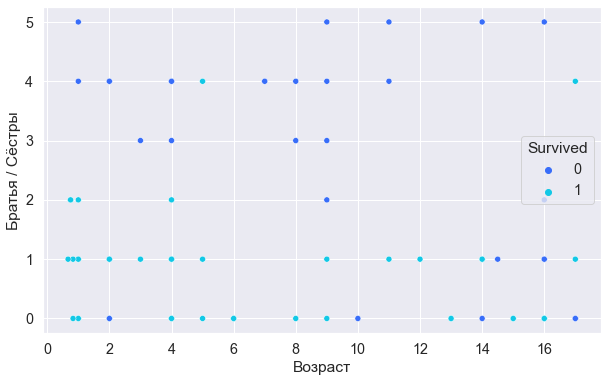

In [11]:
with sns.axes_style('darkgrid'):
    fig, axes = plt.subplots(figsize=(10,6))
    sns.scatterplot(data=train[train.tmp <= 0], x="Age", y="SibSp", hue='Survived')
    axes.set(xlabel='Возраст', ylabel='Братья / Сёстры')

На графике сверху видно, что если у кроме тебя в семье есть ещё дети, то шансы на выживание резко падали.

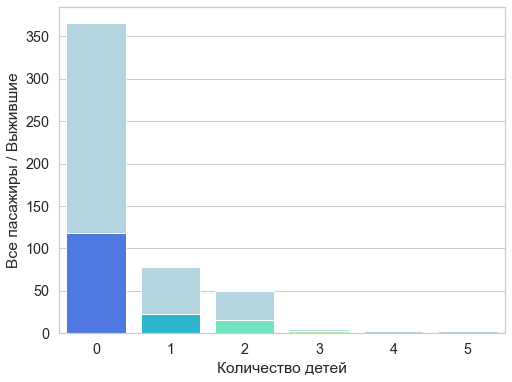

In [12]:
with sns.axes_style('whitegrid'):
    fig, axes = plt.subplots(figsize=(8,6))
    
    tmp = train['Parch'].value_counts();
    
    sns.set_color_codes("muted")
    sns.barplot(x=tmp.index, y=tmp.values, color='lightblue', ci=None)
    
    sns.barplot(data=train[train.tmp >= 1 ].groupby(by='Parch').sum().reset_index(), x="Parch", y="Survived")
    
    axes.set(xlabel='Количество детей', ylabel='Все пасажиры / Выжившие')

Из этого графика можно сделать вывод, что количество детей коррелирует с шансом выжить,
чем больше детей, тем менее вероятно человек спасался.

Подготовим следующие графики, для этого обработаем данные:

In [13]:
def fill_data_heatmap(data, table, index, real_indices, cols):
    count = 0;
    for i in index:
        ind = table.loc[i].index
        for j in cols:
            if j in ind:
                data[real_indices[i]][j] = table.loc[i].loc[j]['Survived'] / table.loc[i].loc[j]['tmp']

In [14]:
#prepare data for SibSp-Parch heatmap
train = train.assign(tmp=1);
tmp = train.groupby(by=['SibSp', 'Parch']).aggregate('sum')

index = np.sort(train['SibSp'].unique());
cols = np.sort(train['Parch'].unique());

data = np.zeros((index.shape[0], cols.shape[0]), dtype=np.float32)
fill_data_heatmap(data, tmp, index, dict(zip(index, range(len(index)))), cols)
data = pd.DataFrame(data);

In [15]:
def round_num(num, *args):
    if len(args) > 0:
        return round(num, args[0]);
    else:
        return round(num)

In [16]:
#prepare data for Fare-Age heatmap

train['Age'] = train['Age'].apply(round_num)
train['Fare'] = train['Fare'].apply(round_num, args=[-1])

index = np.sort(train['Fare'].unique());
cols =  np.sort(train['Age'].unique());

tmp = train.groupby(by=['Fare', 'Age']).sum()
data2 = np.zeros((index.shape[0], 100), dtype=np.float32)
fill_data_heatmap(data2, tmp, index, dict(zip(index, range(len(index)))), cols);
data2 = pd.DataFrame(data2, index, np.arange(100));

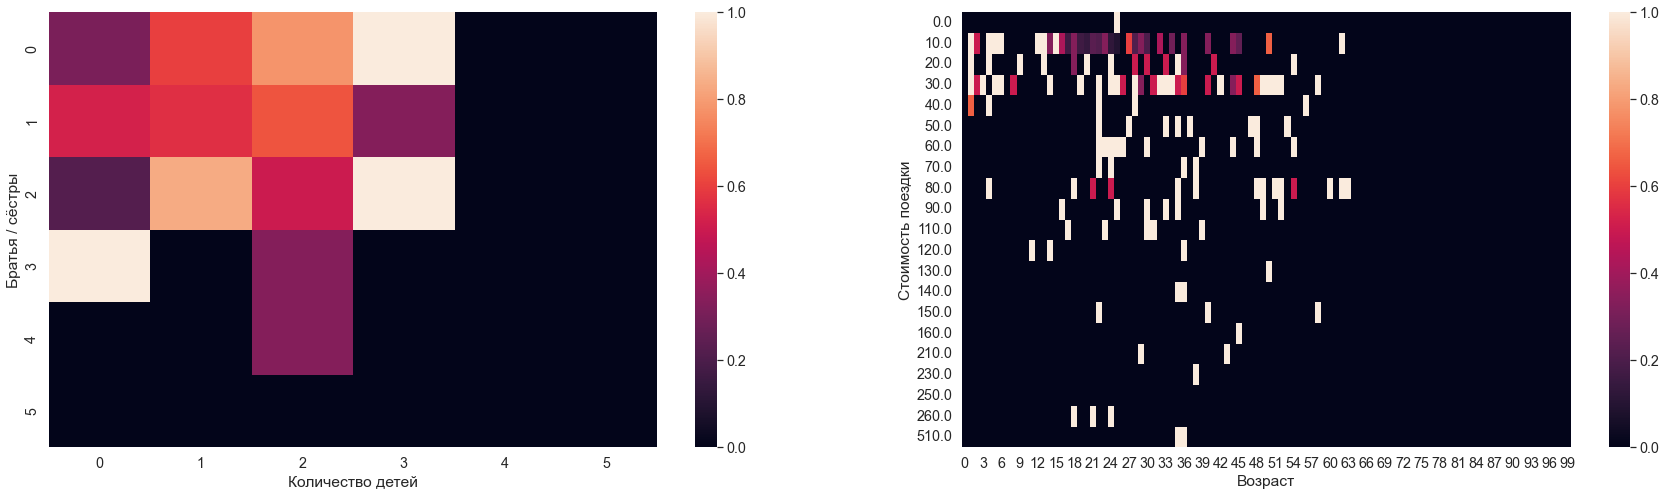

In [17]:
with sns.axes_style('whitegrid'):
    fig, axes = plt.subplots(1,2, figsize=(30,8))
    
    sns.heatmap(data, ax=axes[0])
    axes[0].set(xlabel='Количество детей', ylabel='Братья / сёстры')
    
    sns.heatmap(data2, ax=axes[1])
    axes[1].set(xlabel='Возраст', ylabel='Стоимость поездки')

Из графиков выше можно сделать 2 вывода:

    1. Чем меньше детей и братьев/сестёр ты имеешь на борту, тем больше твой шанс выжить
    2. Чем больше денег ты заплатил за круиз, и чем старше ты, тем больше у тебя шанс сохранить свою жизнь на Титанике)

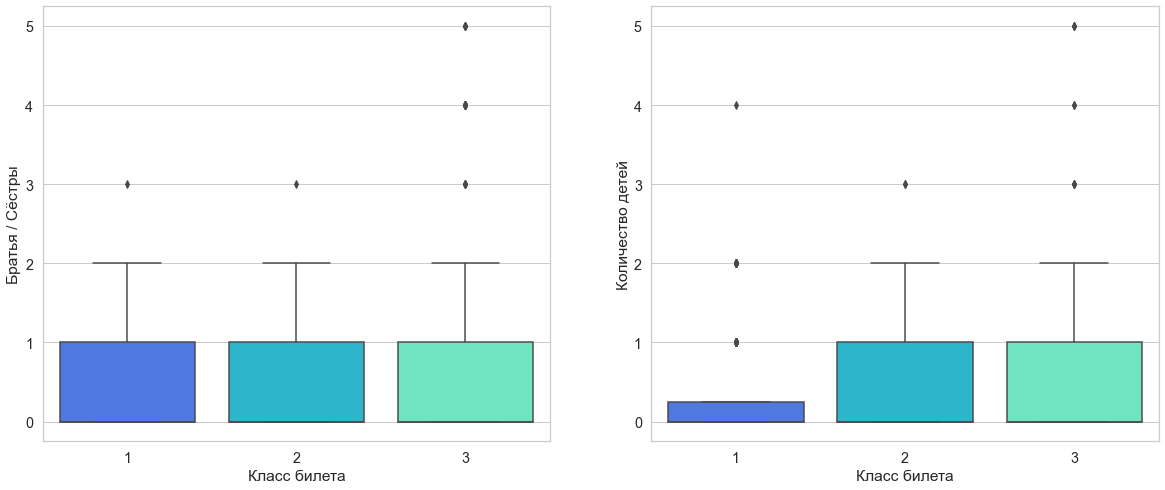

In [18]:
with sns.axes_style('whitegrid'): 
    fig, axes = plt.subplots(1,2, figsize=(20,8))
    
    sns.boxplot(x='Pclass', y='SibSp', data=train, ax=axes[0])  
    sns.boxplot(x='Pclass', y='Parch', data=train, ax=axes[1])
    
    axes[0].set(xlabel='Класс билета', ylabel='Братья / Сёстры')
    axes[1].set(xlabel='Класс билета', ylabel='Количество детей')

Видно, что в третьем классе было больше всего пассажиров с детьми на борту. 
Люди путешествовали целыми семьями, но они не обладали большими богатствами.

#### 3. Классификация методом ближайшего соседа

Ранее в контесте вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [19]:
def find_nearest_points(A: np.ndarray, B: np.ndarray, k: int) -> np.ndarray:    
    B = np.expand_dims(B, axis=1);
    C = A-B;
    C = np.power(C, 2)
    C = np.sum(C, axis=-1);
    ind = np.argsort(C, axis=1)

    return (ind[:, :k])

In [20]:
def normalize(data):
    cols_max = data.describe().loc['max']
    for col in data.columns:
        data[col] = data[col].apply(lambda x: x / cols_max.loc[col])

In [21]:
def majority(arr1, arr2):
    ratio = arr2[arr1].sum() / len(arr1);
    if ratio > 0.5:
        return 1
    elif ratio == 0.5:
        return 0;
    else:
        return 0

In [22]:
def knn(features, train_features, to_consider, target, k=1):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    '''
    tmp_features = features.drop(labels=features.columns.difference(to_consider), axis=1)
    tmp_train = train_features.drop(labels=train_features.columns.difference(to_consider), axis=1)
    
    normalize(tmp_features)
    normalize(tmp_train)

    tmp_features = tmp_features.to_numpy()
    tmp_train = tmp_train.to_numpy()
    target = target.to_numpy()
    return pd.Series(np.apply_along_axis(lambda arr: majority(arr, target), 1, find_nearest_points(tmp_train, tmp_features, k)))
    

Постройте классификатор методом ближайшего соседа, используя только признаки `Age` и `Fare`. 

Какую метрику (функцию расстояния) вы при этом используете? Нужно ли предварительно что-то сделать с признаками?

In [23]:
train = get_features_and_target(train)
test = get_features_and_target(test)

train_target = train[1]
train = train[0]

test_target = test[1]
test = test[0]

In [24]:
res = knn(test, train, ['Age', 'Fare'], train_target, 7)

tests_total_surv = test_target.sum();
tests_total = len(test.index)

Как меняется результат классификации при другом количестве соседей? Рассмотрите хотя бы три различных нечетных значения количества соседей.

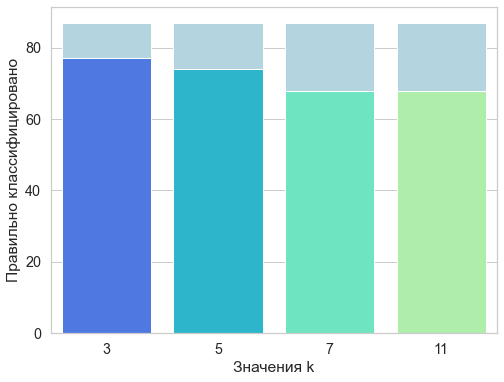

In [25]:
primes = [3, 5, 7, 11]
results = []
for num in primes:
    results.append(knn(test, train, ['Age', 'Fare'], train_target, num).sum());

with sns.axes_style('whitegrid'):
    fig, axes = plt.subplots(figsize=(8,6))
    
    sns.set_color_codes("muted")
    sns.barplot(x=primes, y=np.full((len(primes)), tests_total_surv), color='lightblue', ci=None)
    
    sns.barplot(x=primes, y = results)
    axes.set(xlabel='Значения k', ylabel='Правильно классифицировано')

**Видно, что с ростом k точность модели падает**

Как можно было бы учесть другие признаки? Какие при этом могут возникнуть проблемы? 

Их нужно закодировать числовым значением и нормировать

Строить классификатор с другими признаками при этом не нужно.

#### 4. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

...

**Дерево 2:**

...

Реализуйте полученные деревья по шаблону

In [26]:
def tree(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    res = pd.Series(data=np.zeros(len(features.index)), index=features.index, dtype=np.int64);
    
    tmp = features.query("Age < 55");
    tmp.query("Pclass != 3", inplace=True);
    tmp.query("Parch <= 1", inplace=True)
    tmp.loc[tmp['Sex'] == "female"]
    
    res.loc[tmp.index] = 1
    
    return res

In [27]:
def second_tree(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    res = pd.Series(data=np.zeros(len(features.index)), index=features.index, dtype=np.int64);
    
    tmp = features.query("Fare > 60");
    tmp.query("SibSp <= 1", inplace=True);
    
    res.loc[tmp.index] = 1
    
    return res

#### 5. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

...

Реализуйте данный критерий по шаблону

In [28]:
def criteria(target, predicted):
    '''
    Вычисление критерия качества для предсказания predicted, 
    если истинные значения -- target.
    Возвращает одно вещественное число.
    '''
    return 1 - (abs(target.sum() - predicted.sum()) / len(target.index))

Оцените качество построенных ранее моделей (два дерева, kNN), используя предложенный критерий.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [29]:
print(f"Первое дерево: {criteria(test_target, tree(test))}");
print(f"Второе дерево: {criteria(test_target, second_tree(test))}");
print(f"kNN: {criteria(test_target, knn(test, train, ['Age', 'Fare'], train_target, 7).sum())}")

Первое дерево: 0.9808612440191388
Второе дерево: 0.722488038277512
kNN: 0.9090909090909091


Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

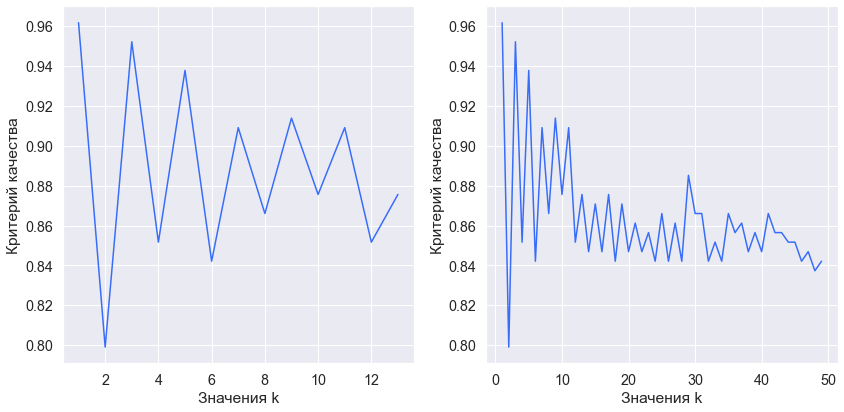

In [30]:
nums = np.arange(1,50);

results = []
for num in nums:
    results.append(criteria(test_target, knn(test, train, ['Age', 'Fare'], train_target, num).sum()) );

with sns.axes_style('darkgrid'):
    fig, axes = plt.subplots(1, 2, figsize=(12,6))
    
    sns.lineplot(x=nums[:13], y = results[:13], ax = axes[0])
    axes[0].set(xlabel='Значения k', ylabel='Критерий качества')
    
    sns.lineplot(x=nums, y = results, ax = axes[1])
    axes[1].set(xlabel='Значения k', ylabel='Критерий качества')
    
    fig.tight_layout()

Видно, что точность держится приблизительно на одном уровне для  0 < k <= 10

На более общем графике видно, что максимум достигается при k ≈ 5, потом начинается спад.

#### 6. Выводы

Из графиков я сделал следующие выводы:

    1. Если пассажир ребёнок, то вероятность выживание у него высокая
    2. Если пассажиру больше 55 лет, то его шансы на выживание низкие
    3. Чем больше у пассажира детей, или братьев тем меньше у него шансы выжить
    4. Чем богаче пассажир, и ближе к возрасту 50 лет, тем больше у него шансов спастись
Также я научился на практике использовать метод ближайших соседей и использовал выводы выше для построения деревьев решений.